# Analysis of Transcription Regulatory Networks (TRNs)

In [1]:
import init
import common.constants as cn
from common.trinary_data import TrinaryData
from common.data_provider import DataProvider
from common_python.plots import util_plots
from plots import util_plots as xutil_plots

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
PROVIDER = DataProvider()
PROVIDER.do()

In [3]:
TRINARY = TrinaryData(is_averaged=False, is_dropT1=False)

In [5]:
PROVIDER.df_trn_unsigned.head()

,tf,GENE_ID,sign
0,Rv0022c,Rv0029,1
1,Rv0022c,Rv0030,1
2,Rv0022c,Rv0031,1
3,Rv0022c,Rv0069c,1
4,Rv0022c,Rv0070c,1


Text(0.5, 1.0, 'Number of Modules for Genes')

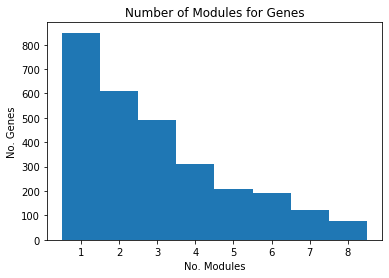

In [6]:
dfg_signed = PROVIDER.df_trn_unsigned.groupby(cn.GENE_ID)
ser = dfg_signed.count()[cn.SIGN]
ser.head()
xv = [v - 0.5 for v in range(1,10)]
plt.hist(ser.values, bins=xv)
plt.xlabel("No. Modules")
plt.ylabel("No. Genes")
plt.title("Number of Modules for Genes")

Text(0.5, 1.0, 'CDF of Module Size')

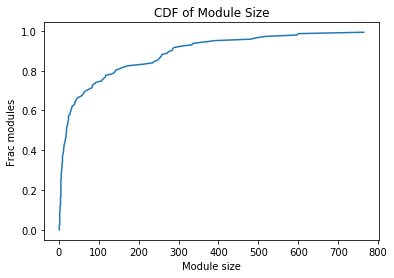

In [7]:
# Module size distribution
ser = (PROVIDER.df_trn_unsigned.groupby(cn.TF)["sign"].count())
ser.head()
xv = [v / len(ser) for v in range(len(ser))]
ser = ser.sort_values(ascending=True)
#plt.hist(ser.values, bins=xv)
plt.plot(ser, xv)
plt.ylabel("Frac modules")
plt.xlabel("Module size")
plt.title("CDF of Module Size")

In [8]:
ser.sort_values(ascending=False)

tf
Rv0081     764
Rv0678     600
Rv1353c    596
Rv1033c    518
Rv0047c    495
          ... 
Rv0623       2
Rv2640c      1
Rv3417c      1
Rv2282c      1
Rv3058c      1
Name: sign, Length: 143, dtype: int64

In [11]:
dct_genes.keys()


array(['Rv0022c', 'Rv0023', 'Rv0042c', 'Rv0043c', 'Rv0047c', 'Rv0054',
       'Rv0067c', 'Rv0078', 'Rv0081', 'Rv0117', 'Rv0135c', 'Rv0158',
       'Rv0195', 'Rv0212c', 'Rv0232', 'Rv0238', 'Rv0273c', 'Rv0275c',
       'Rv0302', 'Rv0324', 'Rv0330c', 'Rv0339c', 'Rv0348', 'Rv0353',
       'Rv0445c', 'Rv0465c', 'Rv0472c', 'Rv0474', 'Rv0494', 'Rv0576',
       'Rv0602c', 'Rv0623', 'Rv0653c', 'Rv0674', 'Rv0678', 'Rv0681',
       'Rv0691c', 'Rv0735', 'Rv0757', 'Rv0767c', 'Rv0818', 'Rv0827c',
       'Rv0880', 'Rv0891c', 'Rv0894', 'Rv0967', 'Rv0981', 'Rv1019',
       'Rv1033c', 'Rv1049', 'Rv1167c', 'Rv1176c', 'Rv1186c', 'Rv1189',
       'Rv1219c', 'Rv1255c', 'Rv1287', 'Rv1332', 'Rv1353c', 'Rv1359',
       'Rv1379', 'Rv1395', 'Rv1404', 'Rv1423', 'Rv1460', 'Rv1473A',
       'Rv1556', 'Rv1657', 'Rv1674c', 'Rv1675c', 'Rv1719', 'Rv1773c',
       'Rv1776c', 'Rv1816', 'Rv1828', 'Rv1846c', 'Rv1956', 'Rv1985c',
       'Rv1990c', 'Rv1994c', 'Rv2009', 'Rv2011c', 'Rv2017', 'Rv2021c',
       'Rv2034', 'Rv2069

Text(0.5, 1.0, 'CDF of Outgoing Arcs')

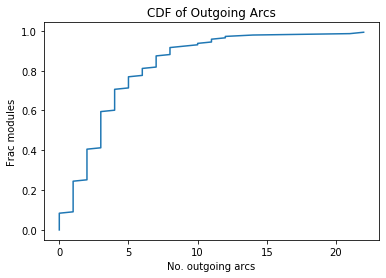

In [26]:
# Number of out-going arcs for modules
dct = PROVIDER.df_trn_unsigned.groupby(cn.TF).groups
dct_genes = {k: PROVIDER.df_trn_unsigned.loc[dct[k], cn.GENE_ID].values for k in dct.keys()}
tfs = PROVIDER.df_trn_unsigned[cn.TF].unique()
dct_size = {}
for key in dct_genes.keys():
    count = 0
    for tf in dct_genes.keys():
        if key in dct_genes[tf]:
            count += 1
    dct_size[key] = count

# Plot
ser = pd.Series(dct_size)
xv = [v / len(ser) for v in range(len(ser))]
ser = ser.sort_values(ascending=True)
#plt.hist(ser.values, bins=xv)
plt.plot(ser, xv)
plt.ylabel("Frac modules")
plt.xlabel("No. outgoing arcs")
plt.title("CDF of Outgoing Arcs") 

In [24]:
type(dct_genes['Rv0022c'])

pandas.core.series.Series

In [ ]:
count = len(PROVIDER.df_trn_unsigned.groupby(cn.TF))
print("Number of modules: %d" % count)

## Visualize Network Relationships
Use networkx to plot the relationship between networks. Network $N_1$ precedes $N_2$ if the TF for $N_2$ is in $N_1$. Networks are labelled by their TF.